<a href="https://colab.research.google.com/github/Ferdaus71/ML_Lab-performance/blob/main/CLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# house_price_nn_pipeline.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
train = pd.read_csv('/content/train.csv')
# test = pd.read_csv('/content/test.csv')

In [ ]:
print('Train shape:', train.shape)

Train shape: (1460, 81)


Data Preprocessing

In [ ]:

X = train.drop('SalePrice', axis=1)
y = train['SalePrice']


numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(exclude=np.number).columns


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


X_processed = preprocessor.fit_transform(X)

print('Processed data shape:', X_processed.shape)

Processed data shape: (1460, 288)


Data Visualization

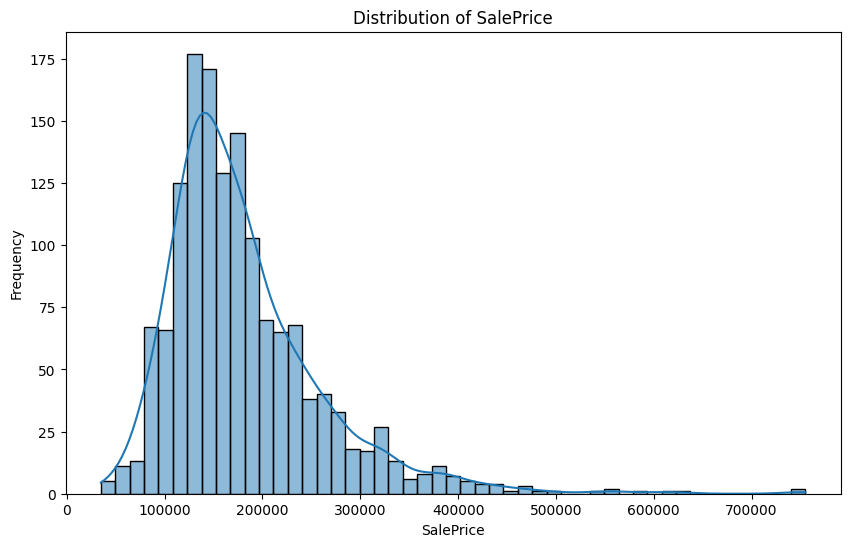

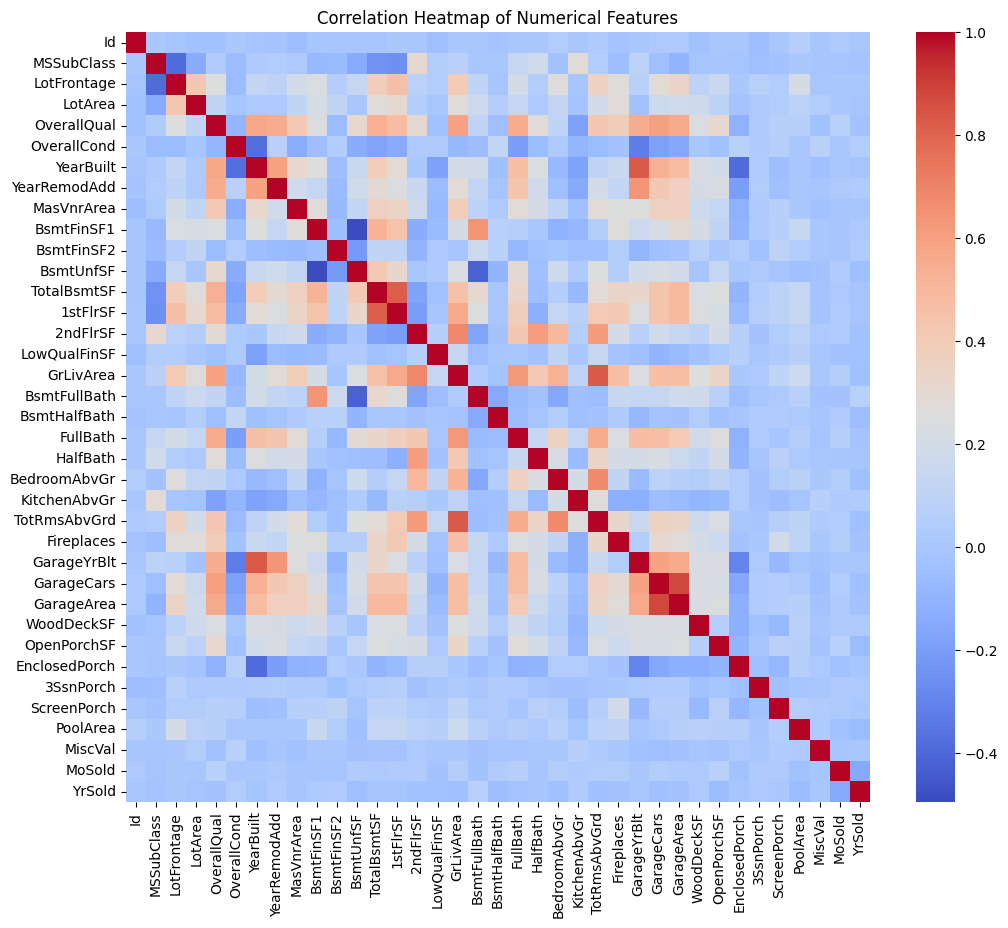

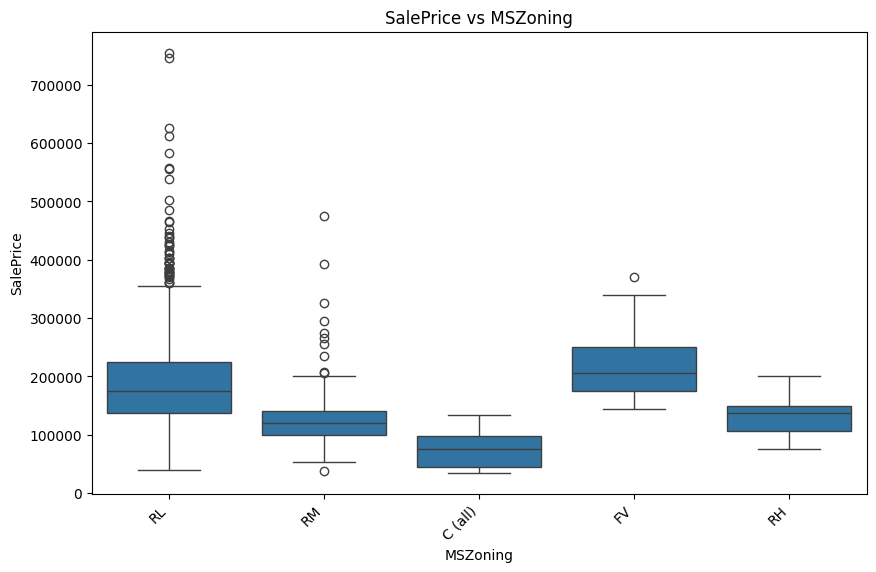

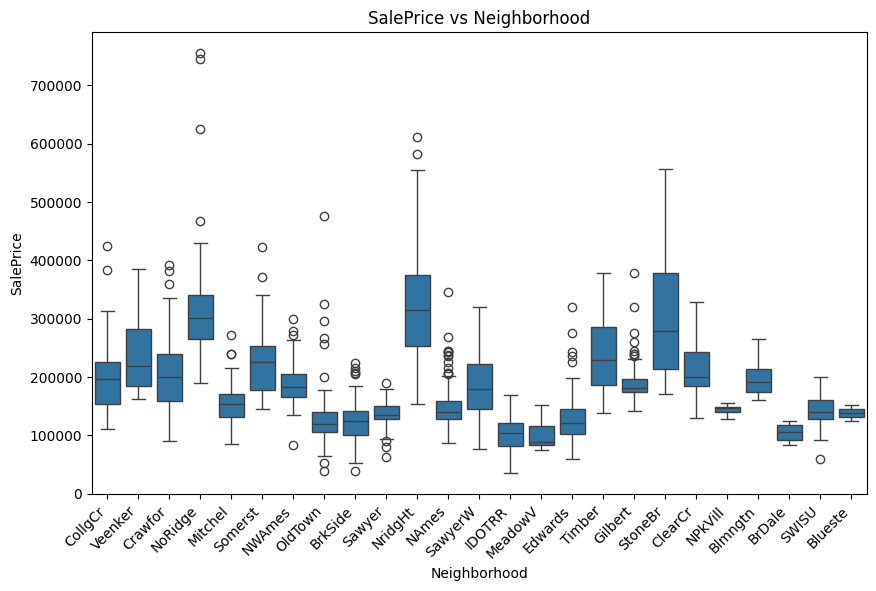

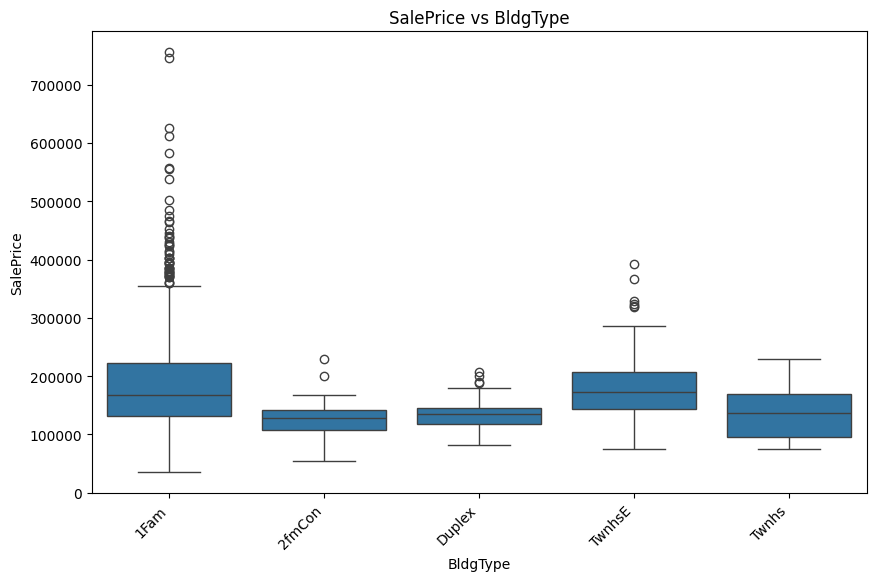

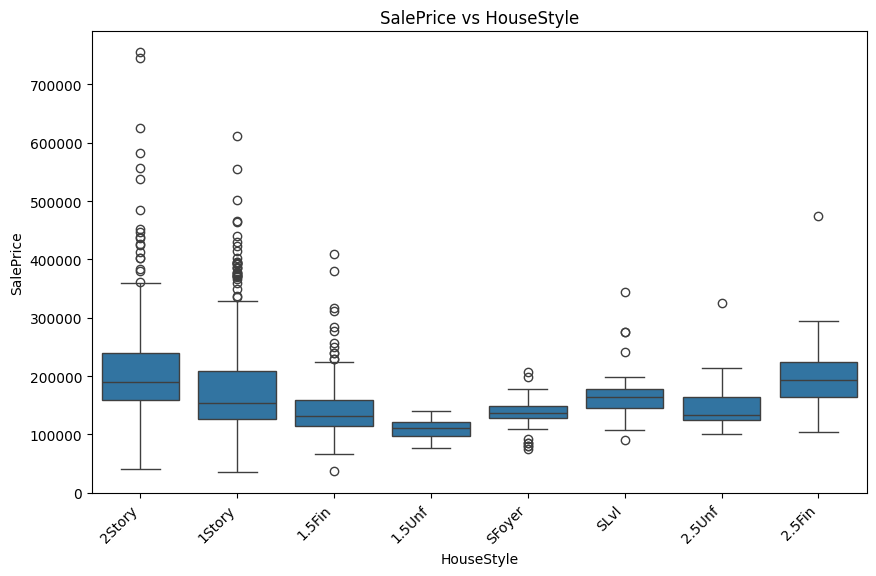

In [ ]:
# Histogram of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap of numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = train[numerical_features].corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


selected_categorical_features = ['MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle']

for feature in selected_categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='SalePrice', data=train)
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=45, ha='right')
    plt.show()

Train-Test Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1168, 288)
X_test shape: (292, 288)
y_train shape: (1168,)
y_test shape: (292,)


Neural Network Model Development

In [ ]:
# Build the Neural Network model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,313 (177.00 KB)

 Trainable params: 45,313 (177.00 KB)

 Non-trainable params: 0 (0.00 B)

Model Training and Evaluation

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 38044254208.0000 - mean_absolute_error: 179812.7969 - val_loss: 37833887744.0000 - val_mean_absolute_error: 181080.3750
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 38725873664.0000 - mean_absolute_error: 181230.4062 - val_loss: 37788061696.0000 - val_mean_absolute_error: 180960.5156
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 38293004288.0000 - mean_absolute_error: 180949.0625 - val_loss: 37641859072.0000 - val_mean_absolute_error: 180577.7812
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39177625600.0000 - mean_absolute_error: 179985.7969 - val_loss: 37301698560.0000 - val_mean_absolute_error: 179686.3906
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 37964382208.0000 - mean_absolute_error: 178995.2656 - val_loss: 36665499648.0000 - val_mean_absolute_error: 178011.0781
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 38903169024.0000 - mean_absolute_error: 18027

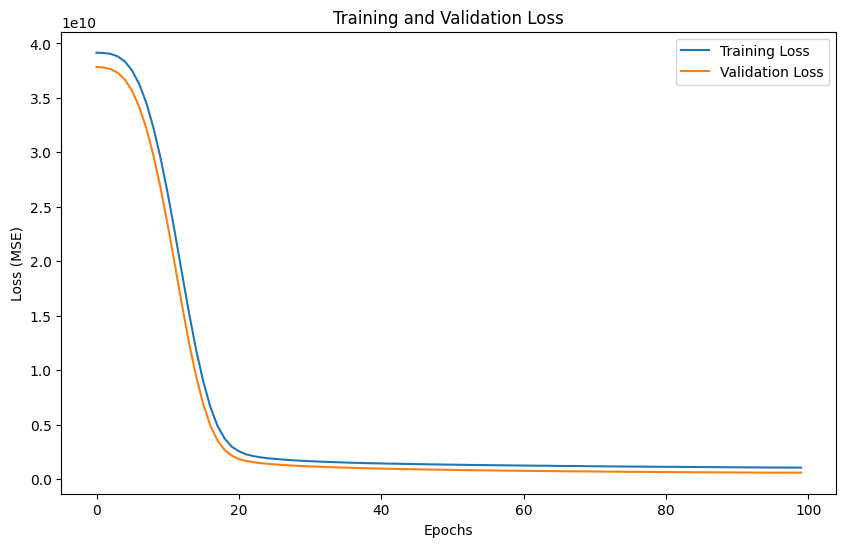

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Mean Absolute Error: {mae}')


rmse = np.sqrt(loss)
print(f'Test Root Mean Squared Error: {rmse}')


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()